In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# === CLASS ENCODING ===
# NO_ACTION = 0
# SHIELD = 1
# GRENADE = 2
# RELOAD = 3
# ENDING = 4

# === RAW DATA ===
# AccX
# AccY
# AccZ
# GyroX 
# GyroY
# GyroZ

In [3]:
DATA_DIR = 'data'
RAW = DATA_DIR + '/raw'

In [4]:
def mean(data):
    return np.mean(data)

def std(data):
    return np.std(data)

def iqr(data):
    '''
    calculate interquartile range
    '''
    q3, q1 = np.percentile(data, [75 ,25])
    return q3 - q1 

def mad(data, axis=None):
    '''
    calculate mean absolute deviation
    '''
    return np.mean(np.absolute(data - np.mean(data, axis)), axis)

In [5]:
sample_data = [[] for _ in range(6)]
    
with open(f'{RAW}/s11r1.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        data_point = map(float, line.split(','))
        for i, n in enumerate(data_point):
            sample_data[i].append(n)

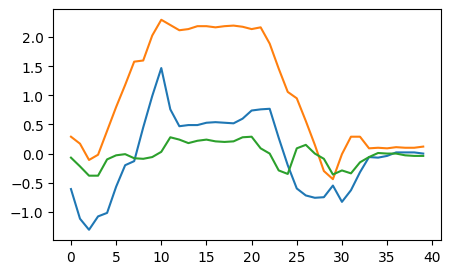

In [6]:
plt.figure(figsize=(5,3))
plt.plot(sample_data[0])
plt.plot(sample_data[1])
plt.plot(sample_data[2])
plt.show()

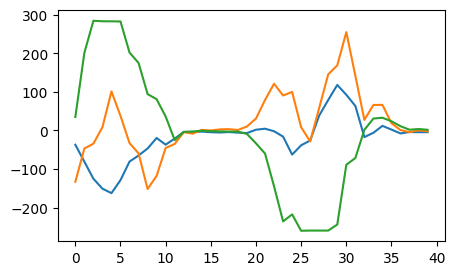

In [7]:
plt.figure(figsize=(5,3))
plt.plot(sample_data[3])
plt.plot(sample_data[4])
plt.plot(sample_data[5])
plt.show()

In [8]:
action_mapping = {'s':1, 'g':2, 'r':3, 'e':4}
data = []

for filename in os.listdir(RAW):
    if filename[-3:] == 'txt' and filename[0] != 'n':
        single_action = [[] for _ in range(6)]
        single_action_tranform = []
        action = action_mapping[filename[0]]

        with open(f'{RAW}/{filename}', 'r') as f:
            lines = f.readlines()
            for line in lines:
                data_point = map(float, line.split(','))
                for i, n in enumerate(data_point):
                    single_action[i].append(n)

        for s in single_action:
            single_action_tranform.append(max(s))
            single_action_tranform.append(min(s))
            single_action_tranform.append(mean(s))
            single_action_tranform.append(std(s))
            single_action_tranform.append(iqr(s))
            single_action_tranform.append(mad(s))
        single_action_tranform.append(action)
        data.append(single_action_tranform)

In [9]:
df = pd.DataFrame.from_records(data)
df.rename(columns={36:'action'}, inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,action
0,0.36,-0.55,-0.05600,0.185119,0.1950,0.130600,0.64,-0.48,0.25375,0.257320,...,80.368929,80.2675,56.665587,121.83,-95.63,13.76900,42.400523,49.8475,33.102700,4
1,0.27,-0.87,-0.14800,0.254649,0.2225,0.185700,1.52,-0.50,0.44200,0.521743,...,112.241522,48.8600,71.131312,190.10,-260.28,-13.01025,105.625801,36.0025,70.917362,3
2,0.58,-0.20,0.04375,0.136431,0.1025,0.088750,0.80,-0.90,0.05575,0.373643,...,85.345034,85.1525,62.295500,70.40,-71.89,-1.68325,35.277483,34.6150,27.462912,4
3,1.38,-1.79,0.06150,0.762107,0.7550,0.559850,1.48,-0.72,0.52100,0.566457,...,119.390664,109.6475,88.603750,280.88,-264.58,9.55500,148.975207,69.8925,105.485250,2
4,1.50,-1.55,-0.06300,0.609972,0.3225,0.401250,1.11,-1.15,0.22175,0.405659,...,138.872482,120.0750,99.343000,281.23,-262.20,12.69025,135.262757,70.5675,91.095287,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,0.27,-0.53,-0.04775,0.189043,0.1775,0.142687,0.80,-0.73,0.13675,0.381264,...,89.864131,112.5975,69.491700,101.75,-81.96,5.18500,32.436483,25.8550,22.660000,4
842,1.97,-1.85,-0.01875,0.703176,0.3450,0.453937,2.01,-0.81,0.18175,0.666963,...,93.175881,77.4625,65.056800,284.73,-260.74,-6.90700,146.795926,46.2175,95.748100,1
843,0.74,-0.73,0.07900,0.304744,0.2075,0.218100,1.61,-0.31,0.50825,0.564185,...,113.446793,86.3400,75.802188,279.65,-262.44,-19.95625,95.815667,48.0275,59.434938,3
844,2.01,-1.22,0.04900,0.649511,0.2475,0.414150,1.90,-0.53,0.36300,0.625541,...,96.648737,52.8725,63.004763,280.52,-265.08,-9.47625,140.077046,23.0575,86.835625,1


In [10]:
shield_data = df[df['action'] == 1]
gre_data = df[df['action'] == 2]

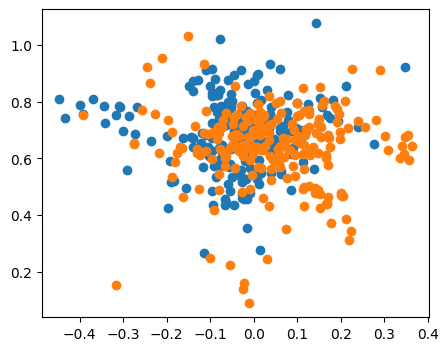

In [11]:
plt.figure(figsize=(5,4))
plt.scatter(shield_data[2], shield_data[3])
plt.scatter(gre_data[2], gre_data[3])

## Train model

In [12]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [13]:
NUM_FEATURES = 36

In [14]:
X = df[[x for x in range(NUM_FEATURES)]]
y = df['action']

In [15]:
y = y - 1 # using 0, 1 labels instead of 1, 2

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42, shuffle=True
)

X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

In [17]:
train_df = X_train.copy()
train_df['action'] = y_train
test_df = X_test.copy()
test_df['action'] = y_test

# train_df.to_csv(f'{DATA_DIR}/train.csv', index=False)
# test_df.to_csv(f'{DATA_DIR}/test.csv', index=False)

In [18]:
len(y_train), len(y_test)

(676, 170)

In [19]:
input_size = 36
hidden_size = 20
num_classes = 4
num_epochs = 600
batch_size = 40
learning_rate = 0.01
device = torch.device('cpu')

In [20]:
class ImuDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __getitem__(self, index):
        return torch.Tensor(self.X.iloc[index].astype(float)), self.y[index]
    
    def __len__(self):
        return len(self.X)

In [21]:
train_dataset = ImuDataset(X_train, y_train)
test_dataset = ImuDataset(X_test, y_test)

train_loader = DataLoader(
    dataset=train_dataset, 
    batch_size=batch_size, 
    shuffle=True
)
test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False
)

In [22]:
class FCN(nn.Module):
    '''
    Fully connected network (MLP) with one hidden layer using ReLU activation function
    '''
    def __init__(self, input_size, hidden_size, num_classes):
        super(FCN, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out) 
        return out

In [23]:
model = FCN(input_size, hidden_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.5)

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sb

def test_conf_matrix(benchmark_loader, is_test_set=False):
    y_pred = []
    y_true = []
    
    with torch.no_grad():
        n_correct = 0
        n_samples = 0
        for data, labels in benchmark_loader:
            labels = labels.to(device)
            y_true.extend(labels)
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            y_pred.extend(predicted)
            n_samples += labels.size(0)
            n_correct += (predicted == labels).sum().item()

        acc = 100.0 * n_correct / n_samples
        if is_test_set:
            print(f'Accuracy on test set: {acc:.4f}%')
        else:
            print(f'Accuracy on train set: {acc:.4f}%')
        
        cf_mat = confusion_matrix(y_true, y_pred)
        cm_df = pd.DataFrame(cf_mat, index=[i for i in range(num_classes)], columns=[i for i in range(num_classes)])
        plt.figure(figsize=(4,3))
        sb.heatmap(cm_df, annot=True)

Before training
Accuracy on train set: 25.7396%
Accuracy on test set: 22.9412%


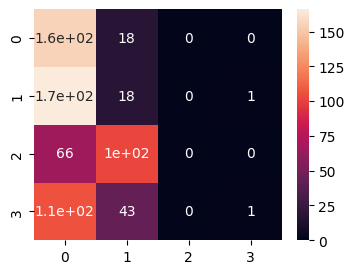

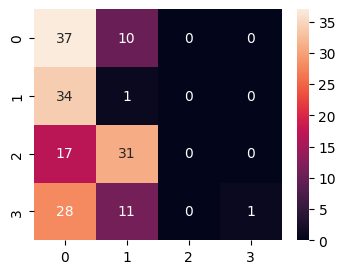

In [25]:
print('Before training')
test_conf_matrix(train_loader)
test_conf_matrix(test_loader, True)

In [26]:
losses = [] # to record loss over training time

for epoch in range(num_epochs):
    for i, (data, label) in enumerate(train_loader):
        label = label.to(device)
        output = model(data)
        loss = criterion(output, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    
    scheduler.step()

    if epoch % 200  == 0:
        print(f'Epoch {epoch+1}/{num_epochs}: loss = {loss.item():.4f}', end='; ')
        print(f"learning rate = {optimizer.param_groups[0]['lr']}")

Epoch 1/600: loss = 1.5488; learning rate = 0.01
Epoch 201/600: loss = 0.0042; learning rate = 0.0025
Epoch 401/600: loss = 0.0028; learning rate = 0.000625


After training
Accuracy on train set: 99.8521%
Accuracy on test set: 98.8235%


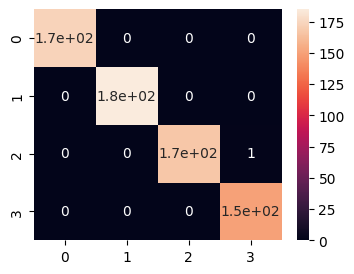

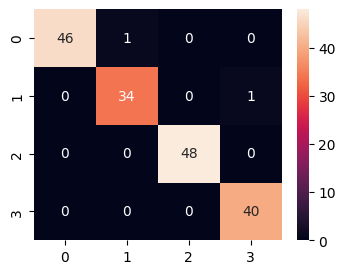

In [27]:
print('After training')
test_conf_matrix(train_loader)
test_conf_matrix(test_loader, True)

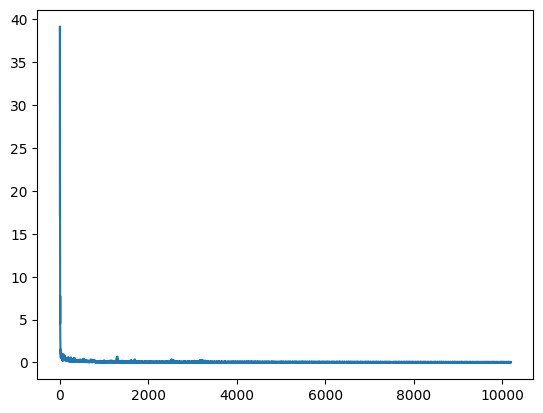

In [28]:
plt.plot(losses)

In [29]:
# torch.save(model, 'model.pth')

## Extract weight

In [30]:
for weight in model.state_dict():
    print(weight)

l1.weight
l1.bias
l2.weight
l2.bias


In [31]:
for key, val in model.state_dict().items():
    print(key, val.shape)

l1.weight torch.Size([20, 36])
l1.bias torch.Size([20])
l2.weight torch.Size([4, 20])
l2.bias torch.Size([4])


In [32]:
l1_weight = model.state_dict()['l1.weight'].tolist()
l2_weight = model.state_dict()['l2.weight'].tolist()
l1_bias = model.state_dict()['l1.bias'].tolist()
l2_bias = model.state_dict()['l2.bias'].tolist()

In [33]:
print("const float l1_bias[HIDDEN_SIZE] = {", end='')
biases = ''
for b in l1_bias:
    biases += str(b) + ', '
biases = biases[:-2] + '};'
print(biases)

const float l1_bias[HIDDEN_SIZE] = {0.08474669605493546, -0.020072398707270622, 1.9687259197235107, -0.18328945338726044, 0.03754550218582153, 0.13633598387241364, 0.1213717982172966, -0.13852491974830627, -0.12900574505329132, -0.13679197430610657, -0.10780759155750275, -0.12030666321516037, -0.12854115664958954, -0.2859577536582947, -0.11361565440893173, -1.112903356552124, 0.00900269579142332, -0.645752489566803, -3.9731523990631104, 0.06364607810974121};


In [34]:
print("const float l2_bias[NUM_CLASSES] = {", end='')
biases = ''
for b in l2_bias:
    biases += str(b) + ', '
biases = biases[:-2] + '};'
print(biases)

const float l2_bias[NUM_CLASSES] = {-1.0320011377334595, -4.2712249755859375, 1.1554243564605713, 4.187164783477783};


In [35]:
print("const float l1_weights[HIDDEN_SIZE][INPUT_SIZE] = {", end='')
weights = ''
for row in l1_weight:
    weights += '{'
    for cell in row:
        weights += str(cell) + ', '
    weights = weights[:-2] + '},\n'
weights = weights[:-2] + '};'
print(weights)

const float l1_weights[HIDDEN_SIZE][INPUT_SIZE] = {{-0.08338826149702072, 0.11525223404169083, -0.15421541035175323, 0.07804817706346512, -0.19481833279132843, -0.03227658197283745, 0.06861835718154907, 0.1725550889968872, -0.19147612154483795, 0.10289415717124939, -0.02627682499587536, -0.16718289256095886, -0.06906983256340027, -0.00996464118361473, -0.030510595068335533, -0.13266156613826752, -0.04541186988353729, -0.1516100913286209, -0.059545569121837616, 0.19240142405033112, -0.06709834188222885, 0.09085729718208313, 0.06583528965711594, -0.1735737919807434, -0.12224483489990234, -0.03785169497132301, -0.21048323810100555, -0.14030596613883972, 0.07403623312711716, 0.06623268127441406, -0.1930035650730133, 0.05401838943362236, -0.15379291772842407, 0.022706320509314537, -0.1263883411884308, 0.0374620296061039},
{0.1100364625453949, 0.053841482847929, 0.03793277218937874, 0.03553996980190277, 0.06371236592531204, -0.07587967813014984, -0.03672220557928085, 0.11485987901687622, 0.0

In [36]:
print("const float l2_weights[NUM_CLASSES][HIDDEN_SIZE] = {", end='')
weights = ''
for row in l2_weight:
    weights += '{'
    for cell in row:
        weights += str(cell) + ', '
    weights = weights[:-2] + '},\n'
weights = weights[:-2] + '};'
print(weights)

const float l2_weights[NUM_CLASSES][HIDDEN_SIZE] = {{-0.08775892108678818, 0.06659068912267685, -0.1568964719772339, -0.12219350039958954, -0.12416256219148636, -0.07005949318408966, 0.10866259783506393, -0.16298891603946686, 0.21096856892108917, -0.039888665080070496, 0.007413248065859079, 0.018660176545381546, -0.1285449117422104, -0.005874189548194408, 0.1710757613182068, 0.40346401929855347, 0.06965886056423187, 0.036065954715013504, -0.0636826679110527, -0.07170739024877548},
{-0.12972624599933624, -0.1254640370607376, 0.153499037027359, -0.04868880659341812, 0.16759911179542542, -0.14331158995628357, -0.07688191533088684, 0.003957528155297041, 0.08643907308578491, -0.06785956025123596, 0.010202351957559586, -0.03554374352097511, -0.15853139758110046, -0.11520185321569443, 0.12784165143966675, -0.008553551509976387, -0.013357655145227909, 0.3442191481590271, 0.15031516551971436, -0.11704277992248535},
{0.11997395753860474, -0.1528981626033783, -0.00237324764020741, 0.1251614093780